In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

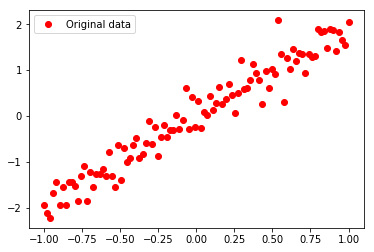

In [2]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
# 创建模型
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")
z = tf.multiply(X, W) + b

In [9]:
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
# cost = tf.reduce_mean(tf.square(Y - z) + 0.1 * tf.square(W))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 1 cost= 0.84147596 W= [0.602432] b= [0.40056035]
Epoch: 3 cost= 0.14777623 W= [1.5618999] b= [0.14559706]
Epoch: 5 cost= 0.08711218 W= [1.8223062] b= [0.0475728]
Epoch: 7 cost= 0.08204034 W= [1.8898464] b= [0.02168667]
Epoch: 9 cost= 0.081451684 W= [1.9073137] b= [0.01498431]
Epoch: 11 cost= 0.081347875 W= [1.9118298] b= [0.01325123]
Epoch: 13 cost= 0.08132427 W= [1.9129977] b= [0.01280308]
Epoch: 15 cost= 0.08131838 W= [1.9132999] b= [0.01268701]
Epoch: 17 cost= 0.08131687 W= [1.913378] b= [0.01265712]
Epoch: 19 cost= 0.08131647 W= [1.9133985] b= [0.0126492]
Finished!
cost= 0.08131641 W= [1.9134021] b= [0.01264789]


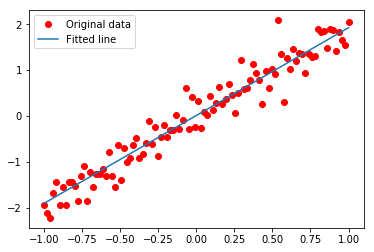

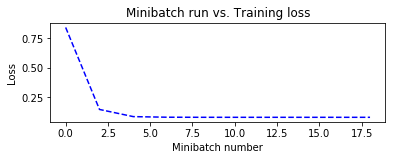

x=0.2, z= [0.3953283]


In [10]:
# 训练模型
init = tf.global_variables_initializer()
training_epochs = 20
display_step = 2

# start session
with tf.Session() as sess:
    sess.run(init)
#     tf.global_variables_initializer().run()
    plotdata = {"batchsize":[], "loss":[]}
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if epoch % display_step ==0:
            loss = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print("Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    
    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    def moving_average(a, w=10):
        if len(a) < w: 
            return a[:]    
        return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()
    
    print("x=0.2, z=", sess.run(z, feed_dict={X: 0.2}))